In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('./dane/driving_log.csv', 
                 names = ['center', 'left', 'right', 'steering_angle', 'throttle', 'break', 'speed'])
df.head()

,center,left,right,steering_angle,throttle,break,speed
0,/home/beata/Studia/Wlasne/KoronaUM/Etap3/dane/...,/home/beata/Studia/Wlasne/KoronaUM/Etap3/dane/...,/home/beata/Studia/Wlasne/KoronaUM/Etap3/dane/...,0.0,0.0,0,1.379382
1,/home/beata/Studia/Wlasne/KoronaUM/Etap3/dane/...,/home/beata/Studia/Wlasne/KoronaUM/Etap3/dane/...,/home/beata/Studia/Wlasne/KoronaUM/Etap3/dane/...,0.0,0.0,0,1.371066
2,/home/beata/Studia/Wlasne/KoronaUM/Etap3/dane/...,/home/beata/Studia/Wlasne/KoronaUM/Etap3/dane/...,/home/beata/Studia/Wlasne/KoronaUM/Etap3/dane/...,0.0,0.0,0,1.360056
3,/home/beata/Studia/Wlasne/KoronaUM/Etap3/dane/...,/home/beata/Studia/Wlasne/KoronaUM/Etap3/dane/...,/home/beata/Studia/Wlasne/KoronaUM/Etap3/dane/...,0.0,0.0,0,1.346417
4,/home/beata/Studia/Wlasne/KoronaUM/Etap3/dane/...,/home/beata/Studia/Wlasne/KoronaUM/Etap3/dane/...,/home/beata/Studia/Wlasne/KoronaUM/Etap3/dane/...,0.0,0.0,0,1.335605


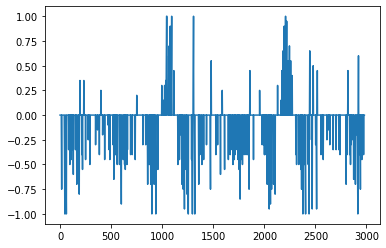

In [3]:
df['steering_angle'].plot()

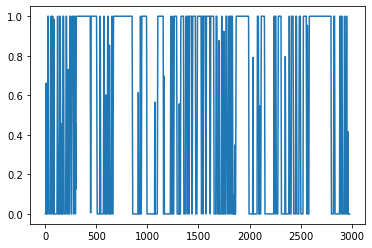

In [4]:
df['throttle'].plot()

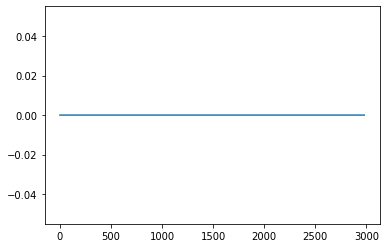

In [5]:
df['break'].plot()

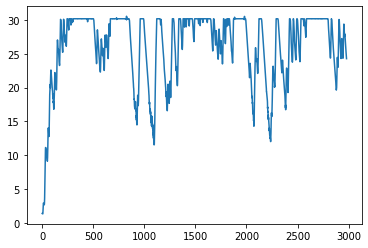

In [6]:
df['speed'].plot()

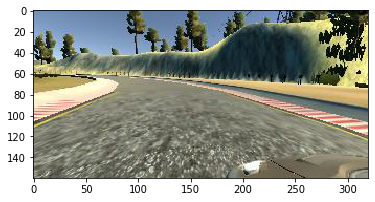

In [7]:
img = Image.open(df['left'][0])
plt.imshow(img)

In [8]:
img = np.asarray(img)
img.shape

(160, 320, 3)

In [9]:
def loadImage(fname):
    return np.asarray(Image.open(fname))
def process_image(img):
    return img[10:130:2, ::4, :]

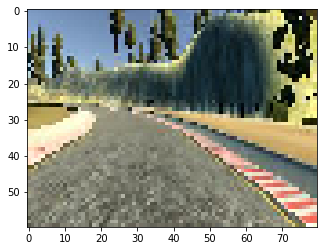

In [10]:
img = process_image(loadImage(df['center'][0]))
plt.imshow(img)

In [11]:
X = [ process_image(loadImage(fname)) for fname in df['center']]
X += [ process_image(loadImage(fname)) for fname in df['left']]
X += [ process_image(loadImage(fname)) for fname in df['right']]

y = np.array(df['steering_angle'])
y = np.concatenate([y, y+0.4, y-0.4])

In [12]:
X = np.array(X)
print(X.shape)
print(y.shape)

(8943, 60, 80, 3)
(8943,)


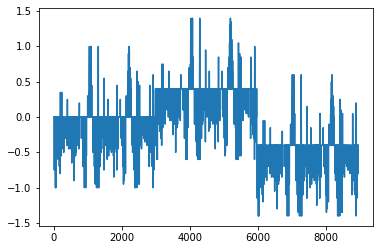

In [14]:
plt.plot(y)
plt.show();

In [15]:
np.save('X.npy', X)
np.save('y.npy', y)